## pix2pix(U-Net + GAN) experiments

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.WARN)

### Model definitions

In [3]:
from utils import load_dataset, save_p2p_models
from utils import plot_p2p_models, plot_p2p_losses
from utils import three_image_generators
from models import g_unet, discriminator, pix2pix
from train import train

Using TensorFlow backend.


### Dataset loading + preprocessing

In [4]:
W = 256
H = 256
dataset_path = '../data/sand'
trend_num = 8
side1_train, side2_train, panorama_train, side1_val, side2_val, panorama_val, N_train, N_val = load_dataset(
    dataset_path, trend_num=trend_num, mode=3, W=W, H=H)

Validation dataset: 100%|██████████| 316/316 [00:00<00:00, 367.42it/s]


In [5]:
batch_size = 40
train_gen, val_gen = three_image_generators(
    side1_train, side2_train, panorama_train, side1_val, side2_val, panorama_val, batch_size=batch_size)

### Training

In [6]:
models_path = 'trained_models/sand'
trend_num = 8
nn_name = 'nf32_dropout_eta5'

In [7]:
# создание моделей
nf = 32
f_gen = g_unet(nf)
d = discriminator(nf)
p2p = pix2pix(f_gen, d, eta=5)
#plot_p2p_models(models_path, trend_num, nn_name, f_gen, d, p2p)

Epoch 1/1
150/150 [==============================] - 118s - loss: 0.0540   
Epoch 1/1
150/150 [==============================] - 128s - loss: 1.7293   

Dir already exist
Dir already exist
Models saved successfully
Dir already exist


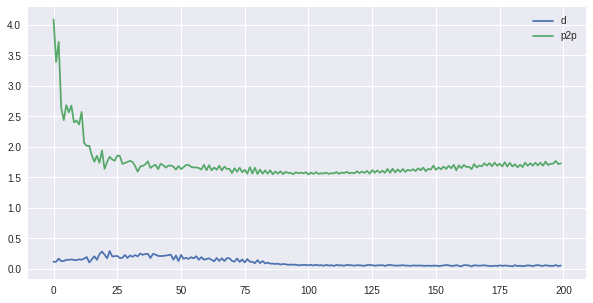

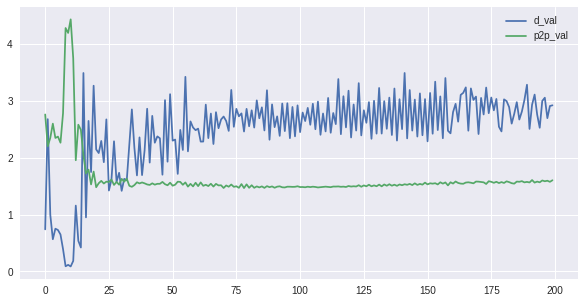

In [ ]:
# обучение
losses = train(f_gen, d, p2p, train_gen, val_gen, epochs=200,
               train_samples=N_train, val_samples=N_val, batch_size=batch_size)
save_p2p_models(models_path, trend_num, nn_name, f_gen, d, losses)
plot_p2p_losses(models_path, trend_num, nn_name, losses)